# Homework Daniel Giordanno Magaña Cruz

## 1. Generate a training set of N = 10 observations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
N = 10
sigma = 0.25

In [3]:
x = np.linspace(0, 2*np.pi, N)
y = np.sin(x) + sigma * np.random.randn(N)

In [4]:
xsin = np.linspace(0, 2*np.pi, 100)
ysin = np.sin(xsin)

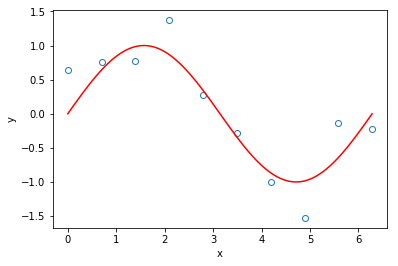

In [5]:
fig, ax = plt.subplots()

ax.plot(x,y, '.', marker = 'o', markerfacecolor = 'none')
ax.plot(xsin, ysin, '-', color = 'red')
ax.set(xlabel = 'x', ylabel = 'y')
plt.show()

## 2. Fit the data using a polynomial function of the form

In [6]:
def get_w(x,y, M):
    """
    Function to obtain the w vector by fitting a M-th order polynomial.
    
    Input:
        x: [Array] Independent variable
        y: [Array] Dependent variable
        M: [Integer] Polynomial order
    
    Output:
        w: [Array] w vector
    """
    
    # 1. Obtaining the matrix A
    
    A = np.zeros((M+1,M+1))
    
    for i in range (M+1):
        for j in range(M+1):
            A[i,j] = (x ** (i+j)).sum()
    
    # 2. Obtaining the matrix B
    
    B = np.zeros((M+1))
    for i in range((M+1)):
        B[i] = ((x**i) * y).sum()
    
    # 3. Obtaining the inverse of A
    
    A_inv = np.linalg.inv(A)
    
    # 4. Multiplication to get the vector w
    
    w = np.matmul(A_inv, B)
    
    return w

In [7]:
def y_predictor(x, w, M):
    """
    Documentation!!
        
    """
    y = [w[i]* (x**i) for i in range(M+1)]
    y = np.array(y)
    y = sum(y)
    return y

In [8]:
M = 0
w = get_w(x, y, M)
y_prediction = y_predictor(x, w, M)

In [9]:
xsmooth = np.linspace(0, 2*np.pi,100)
ysmooth = y_predictor(xsmooth,w,M)

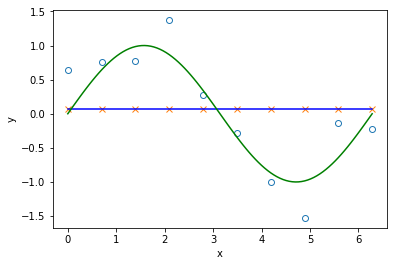

In [10]:
fig, ax = plt.subplots()

ax.plot(x,y, '.', marker = 'o', markerfacecolor = 'none')
ax.plot(x,y_prediction, '.' , marker = 'x', markerfacecolor = 'none')
ax.plot(xsmooth,ysmooth, '-' , color = 'blue')
ax.plot(xsin, ysin, '-', color = 'green')
ax.set(xlabel = 'x', ylabel = 'y')

plt.show()

## 3. Fit your data with different values of M (M = 0, 1, 3, 6, 9). 

In [11]:
def ERMS (y_prediction, y_real):
    N = len(y_prediction)
    error = ((y_prediction - y_real)**2).sum()/2
    return np.sqrt(2*error/N)

In [12]:
def ERMS1(M):   
    """
    This function, takes the M and returns the ERMS OF M
    """
    w = get_w(x, y, M)
    y_prediction = y_predictor(x, w, M)
    """xsmooth = np.linspace(0, 2*np.pi,100)
    ysmooth = y_predictor(xsmooth,w,M)"""
    return ERMS(y_prediction,y)

In [13]:
ERMS1(0)

0.8351799856236095

In [14]:
ERMS1(1)

0.6024949238233023

In [15]:
ERMS1(3)

0.36893635039575806

In [16]:
ERMS1(6)

0.20038171332366747

In [17]:
ERMS1(9)

0.0002316140213563621

In [18]:
df = {'M':  [0,1,3,6,9],
        'ERMS': [0.7483467252418085,0.5815832274538458,0.2900536226473722,0.27696416113200306,0.0004555487628998617]}

In [19]:
table = pd.DataFrame(df,columns={'ERMS','M'})

In [20]:
table

,ERMS,M
0,0.748347,0
1,0.581583,1
2,0.290054,3
3,0.276964,6
4,0.000456,9


## 4. Make a new simulation with N = 20.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
N = 20
sigma = 0.25

In [23]:
x3 = np.linspace(0, 2*np.pi, N)
y3 = np.sin(x3) + sigma * np.random.randn(N)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3)

In [25]:
x_train.shape

(14,)

In [26]:
x_test.shape

(6,)

In [27]:
y_train.shape

(14,)

In [28]:
y_test.shape

(6,)

In [29]:
def get_w4(x3 ,y3, m):
    ws = []
    for i in range (m):
        w = get_w(x3, y3, i)
        ws.append(w)
    return ws

In [30]:
a = get_w4(x_train, y_train, 10)

In [31]:
def find_erros(x3, y3, w):
    erros=[]
    for i in range (10):
        y_prediction = y_predictor(x3, w[i], i)
        a=ERMS(y_prediction,y)
        erros.append(a)
    return erros

In [32]:
def find_erros(x3, y3, w):
    erros=[]
    for i in range (10):
        y_prediction = y_predictor(x3, w[i], i)
        a=ERMS(y_prediction,y3)
        erros.append(a)
    return erros

In [33]:
train = find_erros(x_train, y_train, a )
test = find_erros(x_test, y_test,a)
m=list({0,1,2,3,4,5,6,7,8,9})
m

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

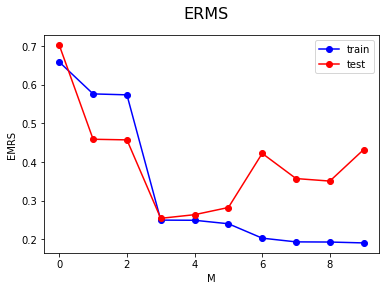

In [34]:
fig, ax = plt.subplots()

ax.plot(m,train, '-', marker = 'o', color = 'blue',label = 'train')
ax.plot(m,test, '-', marker = 'o', color = 'red', label = 'test')
ax.set(xlabel = 'M', ylabel = 'EMRS')
fig.suptitle('ERMS', fontsize=16)
ax.legend()

plt.show()

## 5. Make two simulation with N1 = 15 and N2 = 100.

### First simulation

In [35]:
N1=15
sigma=0.25

In [36]:
x1 = np.linspace(0, 2*np.pi, N1)
y1 = np.sin(x1) + sigma * np.random.randn(N1)

In [37]:
xsin1 = np.linspace(0, 2*np.pi, 100)
ysin1 = np.sin(xsin1)

In [38]:
def get_w(x1,y1, M):
    """
    Function to obtain the w vector by fitting a M-th order polynomial.
    
    Input:
        x: [Array] Independent variable
        y: [Array] Dependent variable
        M: [Integer] Polynomial order
    
    Output:
        w: [Array] w vector
    """
    
    # 1. Obtaining the matrix A
    
    A = np.zeros((M+1,M+1))
    
    for i in range (M+1):
        for j in range(M+1):
            A[i,j] = (x1** (i+j)).sum()
    
    # 2. Obtaining the matrix B
    
    B = np.zeros((M+1))
    for i in range((M+1)):
        B[i] = ((x1**i) * y1).sum()
    
    # 3. Obtaining the inverse of A
    
    A_inv = np.linalg.inv(A)
    
    # 4. Multiplication to get the vector w
    
    w = np.matmul(A_inv, B)
    
    return w

In [39]:
def y_predictor1(x1, w, M):
    """
    Documentation!!
        
    """
    y = [w[i]* (x1**i) for i in range(M+1)]
    y = np.array(y)
    y = sum(y)
    return y

In [40]:
def ERMS (y_prediction, y_real):
    N = len(y_prediction)
    error = ((y_prediction - y_real)**2).sum()/2
    return np.sqrt(2*error/N)

In [41]:
M = 9
w = get_w(x1, y1, M)
y_prediction1 = y_predictor1(x1, w, M)

In [42]:
ERMS(y_prediction1,y1)

0.16989575167524937

In [43]:
xsmooth = np.linspace(0, 2*np.pi,100)
ysmooth = y_predictor1(xsmooth,w,M)

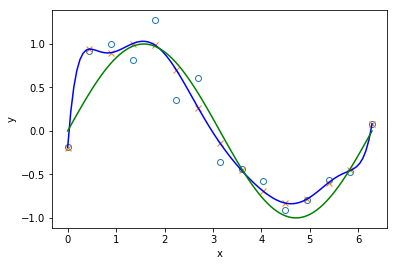

In [44]:
fig, ax = plt.subplots()

ax.plot(x1,y1, '.', marker = 'o', markerfacecolor = 'none')
ax.plot(x1,y_prediction1, '.' , marker = 'x', markerfacecolor = 'none')
ax.plot(xsmooth,ysmooth, '-' , color = 'blue')
ax.plot(xsin1, ysin1, '-', color = 'green')
ax.set(xlabel = 'x', ylabel = 'y')

plt.show()

### Second simulation

In [45]:
N2=100
sigma=0.25

In [46]:
x2 = np.linspace(0, 2*np.pi, N2)
y2 = np.sin(x2) + sigma * np.random.randn(N2)

In [47]:
xsin2 = np.linspace(0, 2*np.pi, 100)
ysin2 = np.sin(xsin2)

In [48]:
def get_w2(x2,y2, M):
    """
    Function to obtain the w vector by fitting a M-th order polynomial.
    
    Input:
        x: [Array] Independent variable
        y: [Array] Dependent variable
        M: [Integer] Polynomial order
    
    Output:
        w: [Array] w vector
    """
    
    # 1. Obtaining the matrix A
    
    A = np.zeros((M+1,M+1))
    
    for i in range (M+1):
        for j in range(M+1):
            A[i,j] = (x2** (i+j)).sum()
    
    # 2. Obtaining the matrix B
    
    B = np.zeros((M+1))
    for i in range((M+1)):
        B[i] = ((x2**i) * y2).sum()
    
    # 3. Obtaining the inverse of A
    
    A_inv = np.linalg.inv(A)
    
    # 4. Multiplication to get the vector w
    
    w = np.matmul(A_inv, B)
    
    return w

In [49]:
def y_predictor2(x2, w, M):
    """
    Documentation!!
        
    """
    y = [w[i]* (x2**i) for i in range(M+1)]
    y = np.array(y)
    y = sum(y)
    return y

In [50]:
def ERMS (y_prediction, y_real):
    N = len(y_prediction)
    error = ((y_prediction - y_real)**2).sum()/2
    return np.sqrt(2*error/N)

In [51]:
M = 9
w = get_w2(x2, y2, M)
y_prediction2 = y_predictor2(x2, w, M)

In [52]:
xsmooth2 = np.linspace(0, 2*np.pi,100)
ysmooth2 = y_predictor2(xsmooth2,w,M)

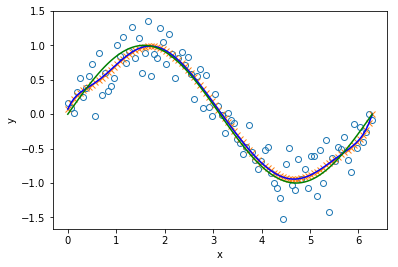

In [53]:
fig, ax = plt.subplots()

ax.plot(x2,y2, '.', marker = 'o', markerfacecolor = 'none')
ax.plot(x2,y_prediction2, '.' , marker = 'x', markerfacecolor = 'none')
ax.plot(xsmooth2,ysmooth2, '-' , color = 'blue')
ax.plot(xsin2, ysin2, '-', color = 'green')
ax.set(xlabel = 'x', ylabel = 'y')

plt.show()

## 6. The dataset auto.csv includes the characteristics of different cars

In [54]:
df = pd.read_csv('Auto.data', sep = '\s+', na_values='?')

In [55]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [56]:
df.shape

(397, 9)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null float64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.0+ KB


In [58]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [59]:
for i in df.horsepower:
    print(i)

130.0
165.0
150.0
150.0
140.0
198.0
220.0
215.0
225.0
190.0
170.0
160.0
150.0
225.0
95.0
95.0
97.0
85.0
88.0
46.0
87.0
90.0
95.0
113.0
90.0
215.0
200.0
210.0
193.0
88.0
90.0
95.0
nan
100.0
105.0
100.0
88.0
100.0
165.0
175.0
153.0
150.0
180.0
170.0
175.0
110.0
72.0
100.0
88.0
86.0
90.0
70.0
76.0
65.0
69.0
60.0
70.0
95.0
80.0
54.0
90.0
86.0
165.0
175.0
150.0
153.0
150.0
208.0
155.0
160.0
190.0
97.0
150.0
130.0
140.0
150.0
112.0
76.0
87.0
69.0
86.0
92.0
97.0
80.0
88.0
175.0
150.0
145.0
137.0
150.0
198.0
150.0
158.0
150.0
215.0
225.0
175.0
105.0
100.0
100.0
88.0
95.0
46.0
150.0
167.0
170.0
180.0
100.0
88.0
72.0
94.0
90.0
85.0
107.0
90.0
145.0
230.0
49.0
75.0
91.0
112.0
150.0
110.0
122.0
180.0
95.0
nan
100.0
100.0
67.0
80.0
65.0
75.0
100.0
110.0
105.0
140.0
150.0
150.0
140.0
150.0
83.0
67.0
78.0
52.0
61.0
75.0
75.0
75.0
97.0
93.0
67.0
95.0
105.0
72.0
72.0
170.0
145.0
150.0
148.0
110.0
105.0
110.0
95.0
110.0
110.0
129.0
75.0
83.0
100.0
78.0
96.0
71.0
97.0
97.0
70.0
90.0
95.0
88.0
98.0
115.0


In [60]:
df.fillna(df.mean(),inplace=True)

#### As we can see below, the nan values have been refilled with the mean of the other values

In [61]:
#
for i in df.horsepower:
    print(i)

130.0
165.0
150.0
150.0
140.0
198.0
220.0
215.0
225.0
190.0
170.0
160.0
150.0
225.0
95.0
95.0
97.0
85.0
88.0
46.0
87.0
90.0
95.0
113.0
90.0
215.0
200.0
210.0
193.0
88.0
90.0
95.0
104.46938775510205
100.0
105.0
100.0
88.0
100.0
165.0
175.0
153.0
150.0
180.0
170.0
175.0
110.0
72.0
100.0
88.0
86.0
90.0
70.0
76.0
65.0
69.0
60.0
70.0
95.0
80.0
54.0
90.0
86.0
165.0
175.0
150.0
153.0
150.0
208.0
155.0
160.0
190.0
97.0
150.0
130.0
140.0
150.0
112.0
76.0
87.0
69.0
86.0
92.0
97.0
80.0
88.0
175.0
150.0
145.0
137.0
150.0
198.0
150.0
158.0
150.0
215.0
225.0
175.0
105.0
100.0
100.0
88.0
95.0
46.0
150.0
167.0
170.0
180.0
100.0
88.0
72.0
94.0
90.0
85.0
107.0
90.0
145.0
230.0
49.0
75.0
91.0
112.0
150.0
110.0
122.0
180.0
95.0
104.46938775510205
100.0
100.0
67.0
80.0
65.0
75.0
100.0
110.0
105.0
140.0
150.0
150.0
140.0
150.0
83.0
67.0
78.0
52.0
61.0
75.0
75.0
75.0
97.0
93.0
67.0
95.0
105.0
72.0
72.0
170.0
145.0
150.0
148.0
110.0
105.0
110.0
95.0
110.0
110.0
129.0
75.0
83.0
100.0
78.0
96.0
71.0
97.0
97.0
7

In [62]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.247388,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [63]:
corr_matrix  = df.corr()

In [64]:
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

In [65]:
mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

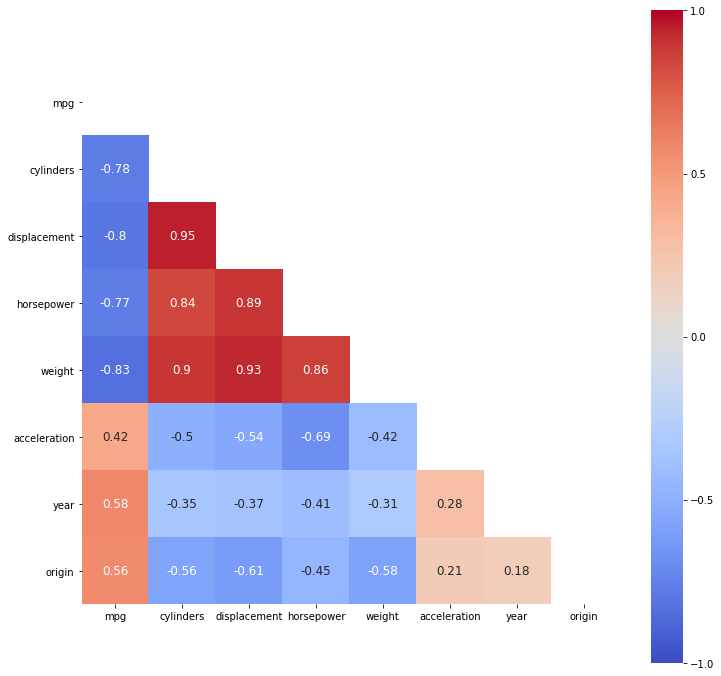

In [66]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (12,12))

heatmap = sns.heatmap(corr_matrix,
                     mask = mask,
                     square = True,
                      cmap = "coolwarm",
                      cbar_kws = {"ticks": [-1,-0.5,0,0.5,1]},
                     vmin=-1,
                     vmax=1,
                     annot = True,
                     annot_kws = {"size": 12})

plt.show()

### Mileage as function of the Horsepower.

In [67]:
mileage = df.mpg
horsepower = df.horsepower

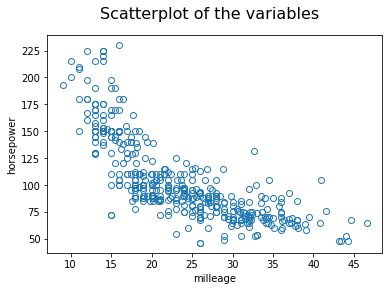

In [68]:
fig, ax = plt.subplots()

ax.plot(mileage,horsepower, '.', marker = 'o', markerfacecolor = 'none')
ax.set(xlabel = 'milleage', ylabel = 'horsepower')
fig.suptitle('Scatterplot of the variables', fontsize=16)

plt.show()

In [69]:
mileage_train, mileage_test, horsepower_train, horsepower_test = train_test_split(mileage, horsepower, test_size=0.3)

In [70]:
train = find_erros(mileage_train, horsepower_train, a)

In [71]:
test = find_erros(mileage_test, horsepower_test,a)

In [72]:
m=list({0,1,2,3,4,5,6,7,8,9})

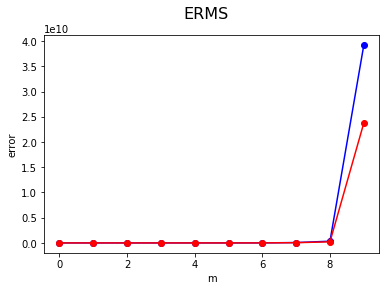

In [73]:
fig, ax = plt.subplots()

ax.plot(m,train, '-', marker = 'o', color = 'blue')
ax.plot(m,test, '-', marker = 'o', color = 'red')
ax.set(xlabel = 'm', ylabel = 'error')
fig.suptitle('ERMS', fontsize=16)

plt.show()

In [74]:
M = 3
w = get_w(mileage, horsepower, M)
y_prediction3 = y_predictor(mileage, w, M)

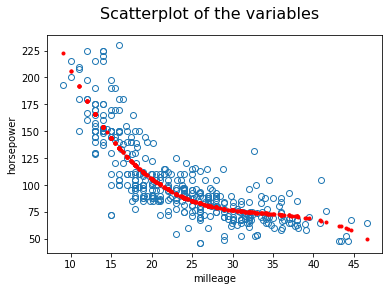

In [75]:
fig, ax = plt.subplots()

ax.plot(mileage,horsepower, '.', marker = 'o', markerfacecolor = 'none')
ax.plot(mileage,y_prediction3, '.',color =  'red')
ax.set(xlabel = 'milleage', ylabel = 'horsepower')
fig.suptitle('Scatterplot of the variables', fontsize=16)

plt.show()

In [76]:
M = 0
w = get_w(mileage, horsepower, M)
y_prediction3 = y_predictor(mileage, w, M)

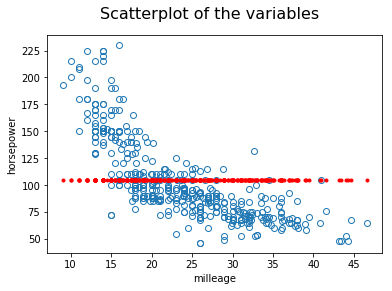

In [77]:
fig, ax = plt.subplots()

ax.plot(mileage,horsepower, '.', marker = 'o', markerfacecolor = 'none')
ax.plot(mileage,y_prediction3, '.',color =  'red')
ax.set(xlabel = 'milleage', ylabel = 'horsepower')
fig.suptitle('Scatterplot of the variables', fontsize=16)

plt.show()

In [78]:
M = 9
w = get_w(mileage, horsepower, M)
y_prediction3 = y_predictor(mileage, w, M)

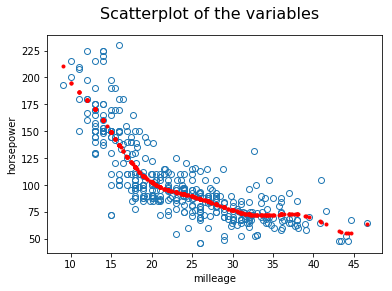

In [79]:
fig, ax = plt.subplots()

ax.plot(mileage,horsepower, '.', marker = 'o', markerfacecolor = 'none')
ax.plot(mileage,y_prediction3, '.',color =  'red')
ax.set(xlabel = 'milleage', ylabel = 'horsepower')
fig.suptitle('Scatterplot of the variables', fontsize=16)

plt.show()

### Mileage as a function of the Displacement.

In [80]:
displacement = df.displacement

In [81]:
mileage_train, mileage_test, displacement_train, displacement_test = train_test_split(mileage, displacement, test_size=0.3)

In [82]:
b = get_w4(mileage_train, displacement_train, 10)

In [83]:
train = find_erros(mileage_train, displacement_train, b )
test = find_erros(mileage_test, displacement_test,b)
m=list({0,1,2,3,4,5,6,7,8,9})

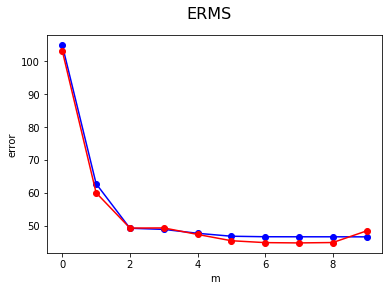

In [84]:
fig, ax = plt.subplots()

ax.plot(m,train, '-', marker = 'o', color = 'blue')
ax.plot(m,test, '-', marker = 'o', color = 'red')
ax.set(xlabel = 'm', ylabel = 'error')
fig.suptitle('ERMS', fontsize=16)

plt.show()

In [85]:
M = 2
w = get_w(mileage, displacement, M)
y_prediction4 = y_predictor(mileage, w, M)

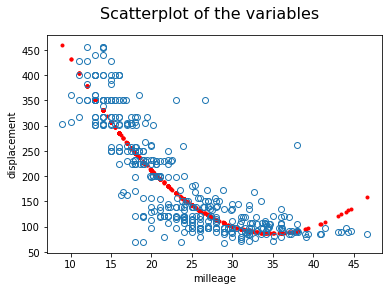

In [86]:
fig, ax = plt.subplots()

ax.plot(mileage,y_prediction4, '.',color =  'red')
ax.plot(mileage,displacement, '.', marker = 'o', markerfacecolor = 'none')
ax.set(xlabel = 'milleage', ylabel = 'displacement')
fig.suptitle('Scatterplot of the variables', fontsize=16)

plt.show()

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3)

### Horsepower as function of the Weight.

In [88]:
weight = df.weight

In [89]:
horsepower_train, horsepower_test, weight_train, weight_test = train_test_split(horsepower, weight, test_size=0.3)

In [90]:
c = get_w4(horsepower_train, weight_train, 10)

In [91]:
train = find_erros(horsepower_train, weight_train, c )
test = find_erros(horsepower_test, weight_test,c)
m=list({0,1,2,3,4,5,6,7,8,9})

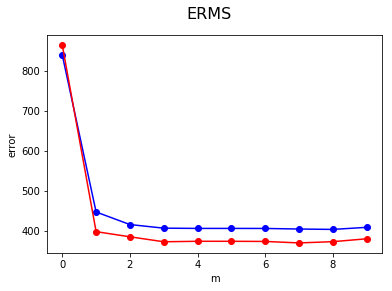

In [92]:
fig, ax = plt.subplots()

ax.plot(m,train, '-', marker = 'o', color = 'blue')
ax.plot(m,test, '-', marker = 'o', color = 'red')
ax.set(xlabel = 'm', ylabel = 'error')
fig.suptitle('ERMS', fontsize=16)

plt.show()

In [93]:
M = 2
w = get_w(horsepower, weight, M)
y_prediction5 = y_predictor(horsepower, w, M)

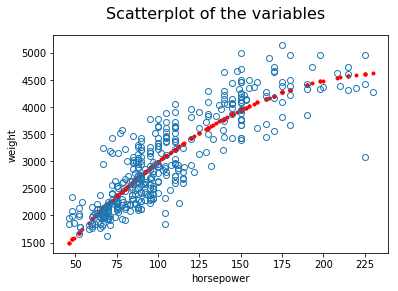

In [94]:
fig, ax = plt.subplots()

ax.plot(horsepower,y_prediction5, '.',color =  'red')
ax.plot(horsepower,weight, '.', marker = 'o', markerfacecolor = 'none')
ax.set(xlabel = 'horsepower', ylabel = 'weight')
fig.suptitle('Scatterplot of the variables', fontsize=16)

plt.show()